# HISCOX - BEAZLEY - FTSE 100

You need to download the daily prices from 02/03/2020 to 28/02/2022, in total 504 days. Then set the first 484 days as the training set and the last 20 days as the test set.

In [1]:
# import required libraries or commands within a library
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import statsmodels.api as sa
import statsmodels.formula.api as sfa
from statsmodels.tsa.api import ExponentialSmoothing as TES 
from statsmodels.tsa.api import SimpleExpSmoothing as SES
from statsmodels.tsa.api import Holt as DES

In [2]:
# Download HSX Sports prices
HSX=yf.download('HSX.L',start='2020-03-02',end='2022-03-01')
BEZ=yf.download('BEZ.L',start='2020-03-02',end='2022-03-01')
FTSE=yf.download('^FTSE',start='2020-03-02',end='2022-03-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
HSX,FTSE,BEZ

(                   Open         High          Low        Close    Adj Close  \
 Date                                                                          
 2020-03-02  1265.000000  1333.000000  1241.000000  1276.000000  1176.169678   
 2020-03-03  1314.000000  1314.000000  1200.000000  1206.000000  1111.646118   
 2020-03-04  1211.000000  1250.500000  1204.000000  1235.000000  1138.377319   
 2020-03-05  1245.000000  1254.000000  1213.000000  1247.000000  1149.438477   
 2020-03-06  1230.000000  1236.000000  1173.605957  1196.000000  1102.428589   
 ...                 ...          ...          ...          ...          ...   
 2022-02-22   904.000000   928.400024   904.000000   917.000000   889.414490   
 2022-02-23   930.200012   930.200012   914.200012   915.000000   887.474670   
 2022-02-24   892.599976   902.000000   880.200012   880.200012   853.721558   
 2022-02-25   876.599976   919.400024   876.599976   919.400024   891.742310   
 2022-02-28   901.000000   926.599976   

## Index HISCOX, BEZON GROUP, FTSE 100 

In [4]:
#show the index of DataFrame
HSX.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [5]:
FTSE.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

In [6]:
BEZ.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [7]:
#check is there any point of HSX index different from BEZ index
HSX.index.difference(BEZ.index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [8]:
#check is there any point of HSX index different from FTSE index
HSX.index.difference(FTSE.index)

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
#check is there any point of HSX index different from FTSE index
BEZ.index.difference(FTSE.index)

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
#drop the row
HSX=HSX.drop(['2020-12-22'])
BEZ=BEZ.drop(['2020-12-22'])

In [11]:
HSX.index,FTSE.index,BEZ.index

(DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
                '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
                '2020-03-12', '2020-03-13',
                ...
                '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
                '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
                '2022-02-25', '2022-02-28'],
               dtype='datetime64[ns]', name='Date', length=504, freq=None),
 DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
                '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
                '2020-03-12', '2020-03-13',
                ...
                '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
                '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
                '2022-02-25', '2022-02-28'],
               dtype='datetime64[ns]', name='Date', length=504, freq=None),
 DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-0

In [12]:
HSX.head(1),BEZ.head(1),FTSE.head(1)

(              Open    High     Low   Close    Adj Close   Volume
 Date                                                            
 2020-03-02  1265.0  1333.0  1241.0  1276.0  1176.169678  2113637,
              Open   High    Low  Close   Adj Close   Volume
 Date                                                       
 2020-03-02  548.0  550.5  520.0  528.5  503.786835  3390739,
                    Open         High     Low        Close    Adj Close  \
 Date                                                                     
 2020-03-02  6580.600098  6775.200195  6496.0  6654.899902  6654.899902   
 
                 Volume  
 Date                    
 2020-03-02  1770844200  )

### Dropping columns

In [13]:
# Drop the columns we don't need
HSX=HSX.drop(columns=['Open','High','Low','Close','Volume'])
BEZ=BEZ.drop(columns=['Open','High','Low','Close','Volume'])
FTSE=FTSE.drop(columns=['Open','High','Low','Close','Volume'])

In [14]:
HSX.head(1),BEZ.head(1),FTSE.head(1)

(              Adj Close
 Date                   
 2020-03-02  1176.169678,
              Adj Close
 Date                  
 2020-03-02  503.786835,
               Adj Close
 Date                   
 2020-03-02  6654.899902)

### Training and Test sets

In [15]:
# Training sets
HSXtr=HSX.iloc[0:484]
BEZtr=BEZ.iloc[0:484]
FTSEtr=FTSE.iloc[0:484]

In [16]:
# Test set
HSXte=HSX.iloc[484:504]
BEZte=BEZ.iloc[484:504]
FTSEte=FTSE.iloc[484:504]

### Daily Returns

### The formula is: today's return = (today's price - yesterday's price)/yesterday's price

In [17]:
#Hiscox Daily returns
returns1=(HSXtr['Adj Close']-HSXtr.shift(1)['Adj Close'])/HSXtr.shift(1)['Adj Close']
#BEZon Group Daily returns
returns2=(BEZtr['Adj Close']-BEZtr.shift(1)['Adj Close'])/BEZtr.shift(1)['Adj Close']
#FTSE 100 Daily returns
returns3=(FTSEtr['Adj Close']-FTSEtr.shift(1)['Adj Close'])/FTSEtr.shift(1)['Adj Close']

In [18]:
HSXtr['Return']=returns1
BEZtr['Return']=returns2
FTSEtr['Return']=returns3

/var/folders/vq/_m6js4b9619dhfpkv2cqslym0000gn/T/ipykernel_44739/1371859907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HSXtr['Return']=returns1
/var/folders/vq/_m6js4b9619dhfpkv2cqslym0000gn/T/ipykernel_44739/1371859907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BEZtr['Return']=returns2
/var/folders/vq/_m6js4b9619dhfpkv2cqslym0000gn/T/ipykernel_44739/1371859907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [19]:
returns1,returns2,returns3

(Date
 2020-03-02         NaN
 2020-03-03   -0.054859
 2020-03-04    0.024047
 2020-03-05    0.009717
 2020-03-06   -0.040898
                 ...   
 2022-01-25    0.006183
 2022-01-26    0.009960
 2022-01-27    0.010701
 2022-01-28   -0.002284
 2022-01-31    0.009988
 Name: Adj Close, Length: 484, dtype: float64,
 Date
 2020-03-02         NaN
 2020-03-03    0.002838
 2020-03-04    0.016981
 2020-03-05   -0.023191
 2020-03-06   -0.052232
                 ...   
 2022-01-25    0.012162
 2022-01-26   -0.000204
 2022-01-27    0.012426
 2022-01-28   -0.017304
 2022-01-31    0.005324
 Name: Adj Close, Length: 484, dtype: float64,
 Date
 2020-03-02         NaN
 2020-03-03    0.009512
 2020-03-04    0.014498
 2020-03-05   -0.016169
 2020-03-06   -0.036210
                 ...   
 2022-01-25    0.010182
 2022-01-26    0.013335
 2022-01-27    0.011312
 2022-01-28   -0.011675
 2022-01-31   -0.000228
 Name: Adj Close, Length: 484, dtype: float64)

In [20]:
HSXte['Return']=(HSXte['Adj Close']-HSXte.shift(1)['Adj Close'])/HSXte.shift(1)['Adj Close']
HSXte.iloc[0,1]=(HSXte.iloc[0,0]-HSXtr.iloc[-1,0])/HSXtr.iloc[-1,0]
BEZte['Return']=(BEZte['Adj Close']-BEZte.shift(1)['Adj Close'])/BEZte.shift(1)['Adj Close']
BEZte.iloc[0,1]=(BEZte.iloc[0,0]-BEZtr.iloc[-1,0])/BEZtr.iloc[-1,0]
FTSEte['Return']=(FTSEte['Adj Close']-FTSEte.shift(1)['Adj Close'])/FTSEte.shift(1)['Adj Close']
FTSEte.iloc[0,1]=(FTSEte.iloc[0,0]-FTSEtr.iloc[-1,0])/FTSEtr.iloc[-1,0]

/var/folders/vq/_m6js4b9619dhfpkv2cqslym0000gn/T/ipykernel_44739/88001785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HSXte['Return']=(HSXte['Adj Close']-HSXte.shift(1)['Adj Close'])/HSXte.shift(1)['Adj Close']
/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/var/folders/vq/_m6js4b9619dhfpkv2cqslym0000gn/T/ipykernel_44739/88001785.py:3: SettingWithCopyWarning: 
A 

## Descriptive Analytics

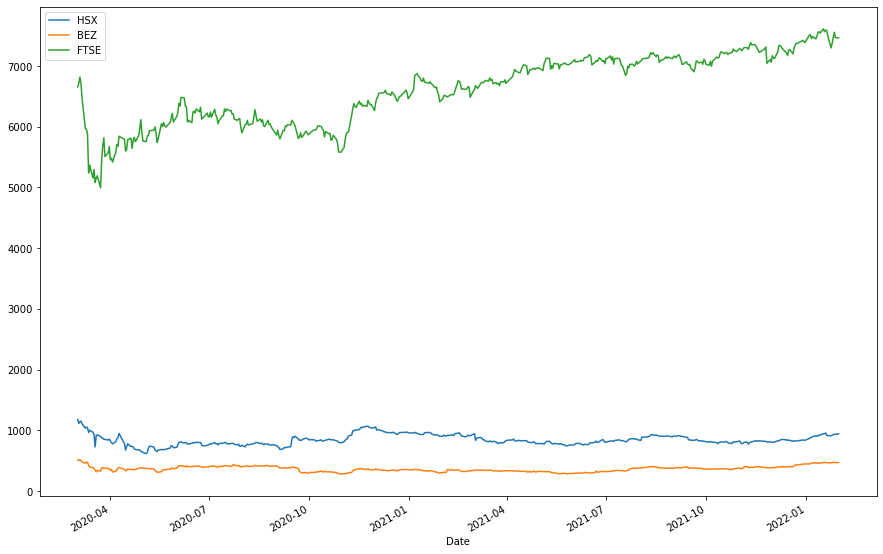

In [21]:
HSXtr['Adj Close'].plot(figsize=(15,10), label='HSX')
BEZtr['Adj Close'].plot(label='BEZ')
FTSEtr['Adj Close'].plot(label='FTSE')
plt.legend()
plt.show()

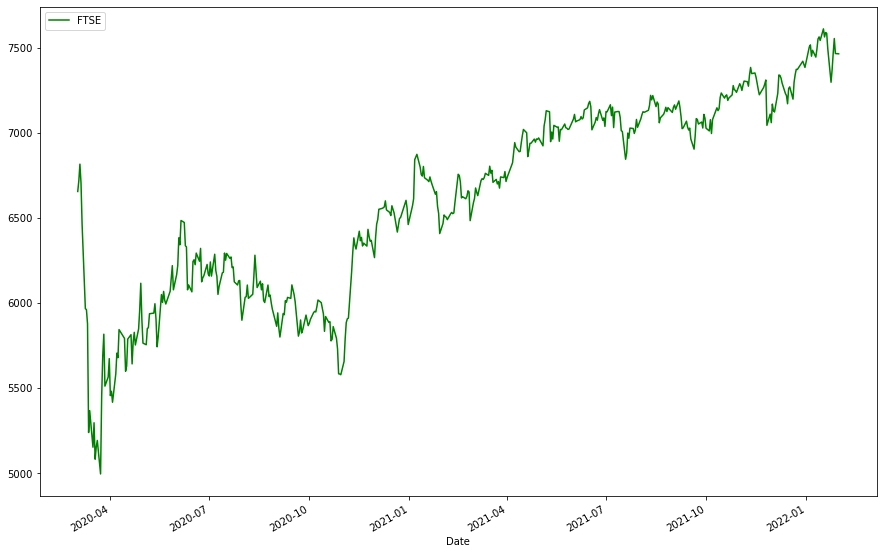

In [22]:
FTSEtr['Adj Close'].plot( figsize=(15,10), label='FTSE', color='g')
plt.legend()
plt.show()

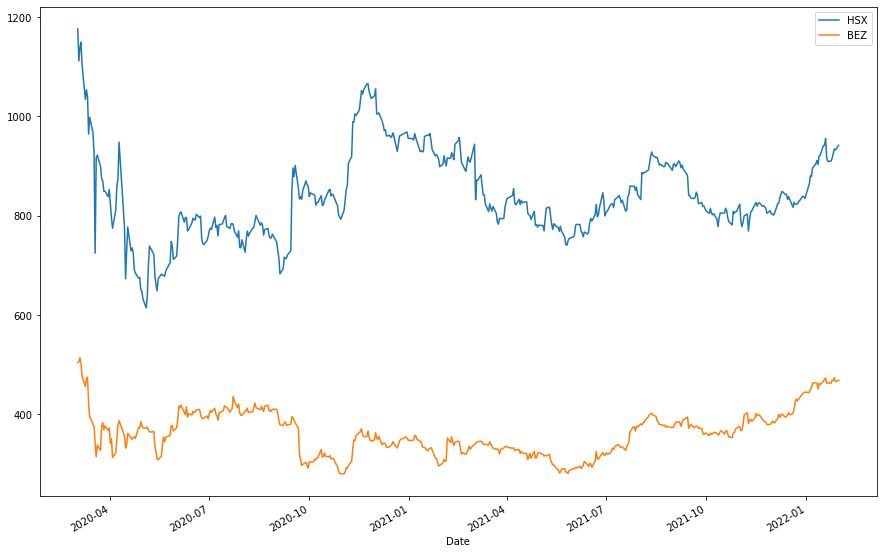

In [23]:
HSXtr['Adj Close'].plot(figsize=(15,10), label='HSX')
BEZtr['Adj Close'].plot(label='BEZ')
plt.legend()
plt.show()

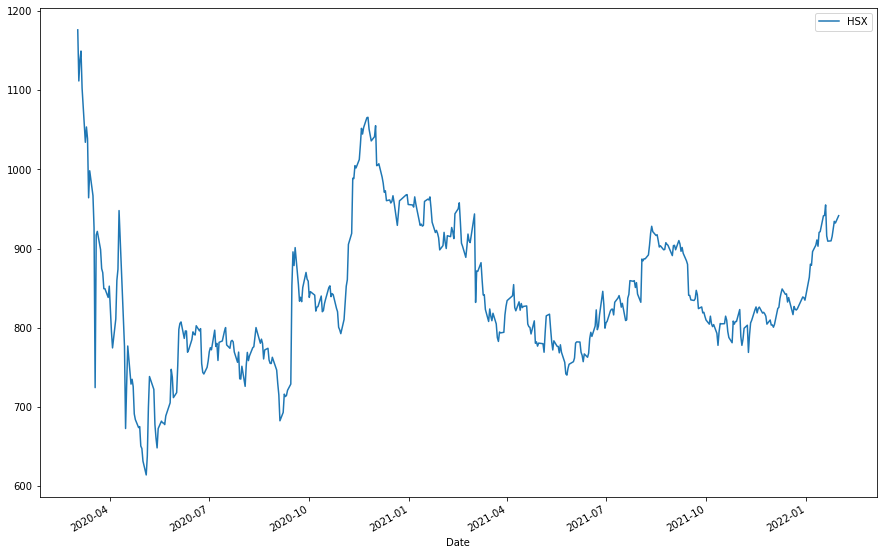

In [24]:
HSXtr['Adj Close'].plot(figsize=(15,10), label='HSX')
plt.legend()
plt.show()

In [25]:
#define a modified FTSE
mFTSEtr=pd.DataFrame()
mFTSEtr['m Adj Close']=FTSEtr['Adj Close']/10

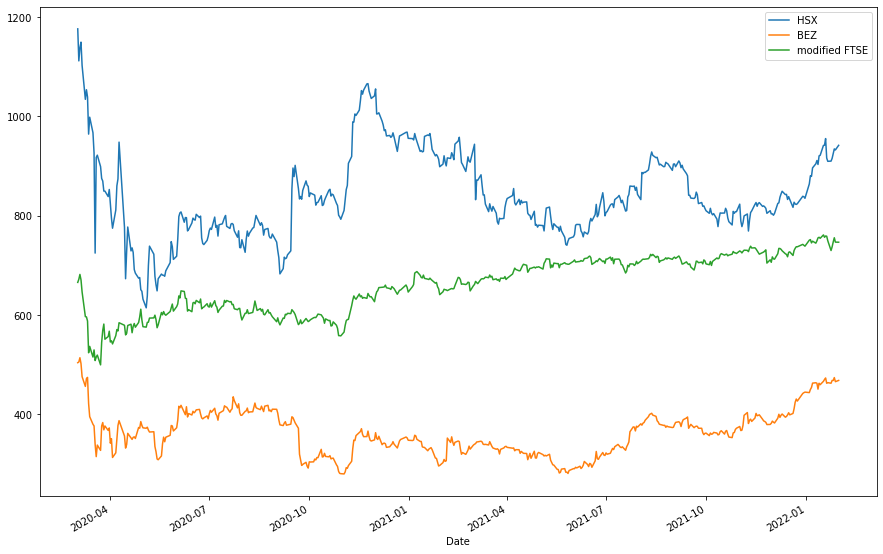

In [26]:
HSXtr['Adj Close'].plot(figsize=(15,10), label='HSX')
BEZtr['Adj Close'].plot(label='BEZ')
mFTSEtr['m Adj Close'].plot(label='modified FTSE')
plt.legend()
plt.show()

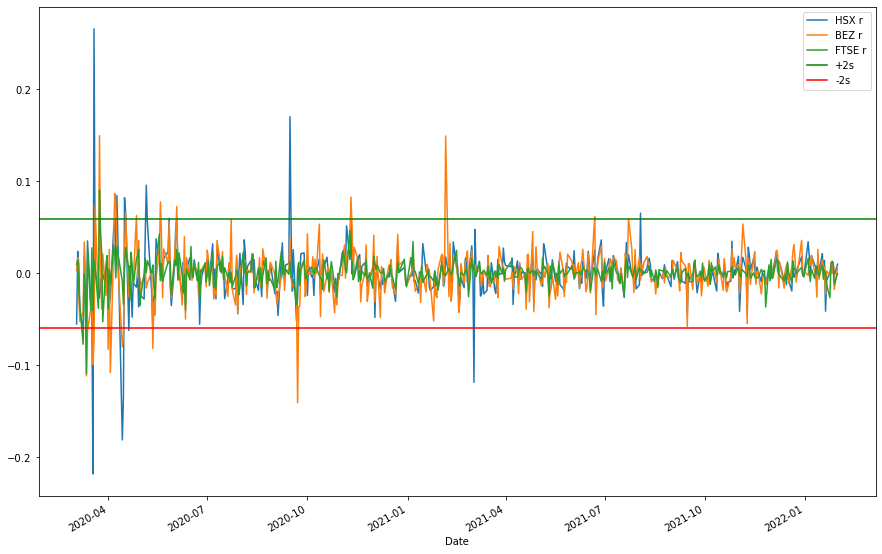

In [27]:
HSXtr['Return'].plot(figsize=(15,10), label='HSX r')
BEZtr['Return'].plot(label='BEZ r')
FTSEtr['Return'].plot(label='FTSE r')
plt.axhline(y=HSXtr['Return'].mean()+2*HSXtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=HSXtr['Return'].mean()-2*HSXtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

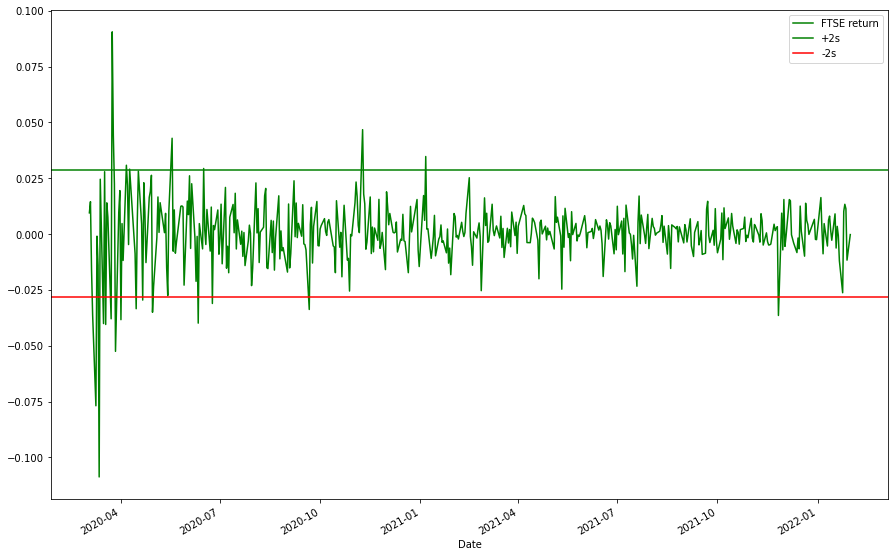

In [28]:
FTSEtr['Return'].plot(label='FTSE return',color='g',figsize=(15,10))
plt.axhline(y=FTSEtr['Return'].mean()+2*FTSEtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=FTSEtr['Return'].mean()-2*FTSEtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

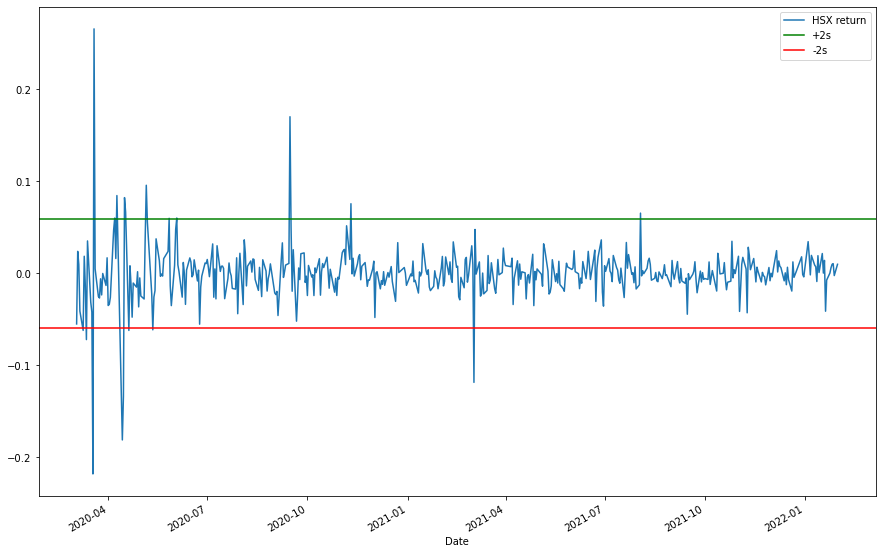

In [29]:
HSXtr['Return'].plot(label='HSX return',figsize=(15,10))
plt.axhline(y=HSXtr['Return'].mean()+2*HSXtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=HSXtr['Return'].mean()-2*HSXtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

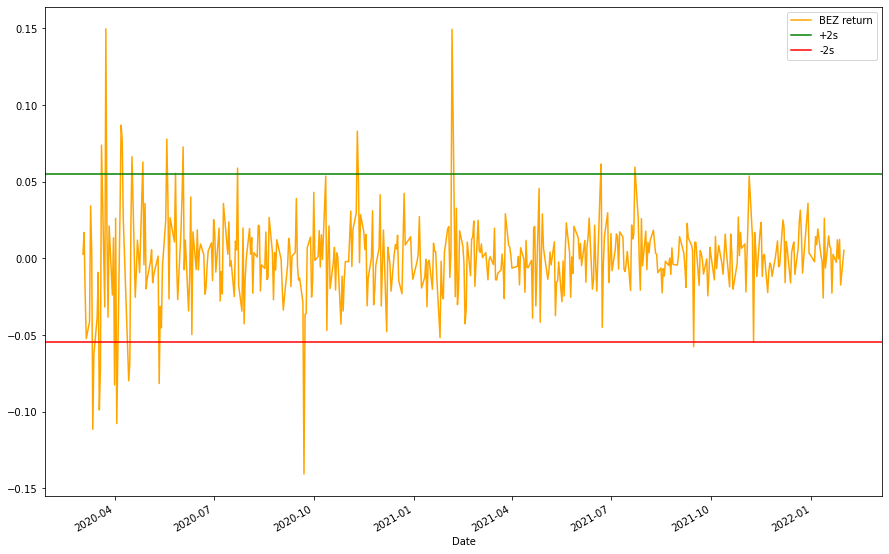

In [30]:
BEZtr['Return'].plot(label='BEZ return', color='orange', figsize=(15,10))
plt.axhline(y=BEZtr['Return'].mean()+2*BEZtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=BEZtr['Return'].mean()-2*BEZtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

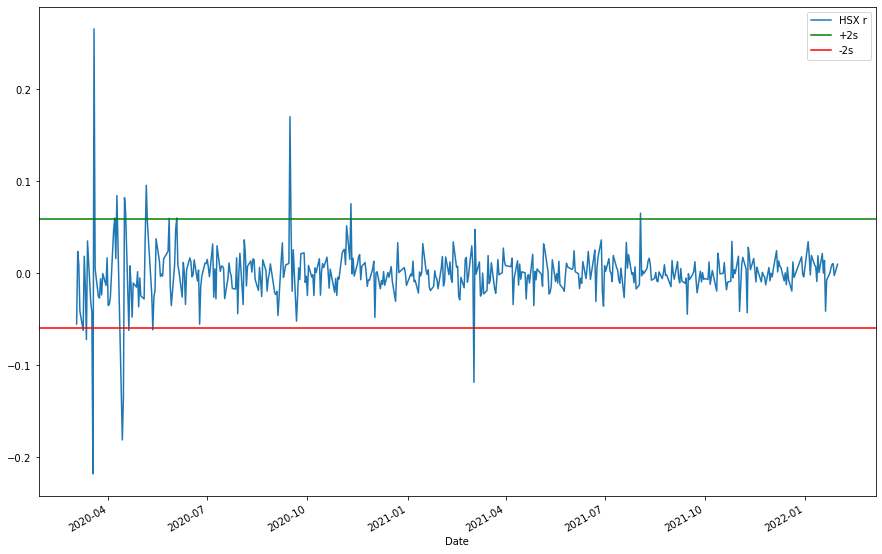

In [31]:
#Empirical Rules, Page 75 of Lecture 1
HSXtr['Return'].plot(figsize=(15,10), label='HSX r')
plt.axhline(y=HSXtr['Return'].mean()+2*HSXtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=HSXtr['Return'].mean()-2*HSXtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

In [32]:
#select rows by value 
pss=HSXtr['Return'].mean()+2*HSXtr['Return'].std()
HSXtr.loc[HSXtr['Return']>=pss]

,Adj Close,Return
Date,,
2020-03-19,917.154236,0.265903
2020-04-07,860.004883,0.060227
2020-04-09,948.033264,0.084687
2020-04-16,728.377197,0.082466
2020-04-17,777.046204,0.066818
2020-05-06,699.433777,0.095898
2020-05-27,747.636230,0.059978
2020-06-03,798.017151,0.060296
2020-09-15,853.205383,0.170404


In [33]:
nss=HSXtr['Return'].mean()-2*HSXtr['Return'].std()
HSXtr.loc[HSXtr['Return']<=nss]

,Adj Close,Return
Date,,
2020-03-09,1034.218262,-0.061873
2020-03-12,964.164001,-0.071872
2020-03-18,724.505737,-0.217910
2020-04-14,776.493164,-0.180943
2020-04-15,672.887024,-0.133428
2020-04-20,728.930176,-0.061922
2020-05-12,678.048828,-0.061256
2021-03-03,832.053101,-0.118378


In [34]:
HSXtr.loc[HSXtr['Return']==HSXtr['Return'].min()]

,Adj Close,Return
Date,,
2020-03-18,724.505737,-0.21791


### Statistics

In [35]:
HSXtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,840.262820,-0.000024
std,87.937095,0.029523
min,614.262878,-0.217910
25%,783.547028,-0.010173
50%,824.333008,0.000412
75%,902.716812,0.010850
max,1176.169678,0.265903


In [36]:
BEZtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,362.280633,0.000219
std,45.728787,0.027284
min,279.680328,-0.140513
25%,328.557678,-0.012636
50%,360.896317,0.001225
75%,393.234940,0.013453
max,513.795898,0.149767


In [37]:
FTSEtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,6605.004545,0.000340
std,572.234329,0.014275
min,4993.899902,-0.108738
25%,6104.700195,-0.004957
50%,6709.800049,0.000712
75%,7092.175171,0.006969
max,7611.200195,0.090530


What can you find by comparing the above tables?

In [38]:
# Return to risk
HSXtr['Return'].mean()/HSXtr['Return'].std()

-0.0008253484931793885

In [39]:
# Return to risk
BEZtr['Return'].mean()/BEZtr['Return'].std()

0.008041487919955818

In [40]:
# Return to risk
FTSEtr['Return'].mean()/FTSEtr['Return'].std()

0.02384533700911166

### Boxplot

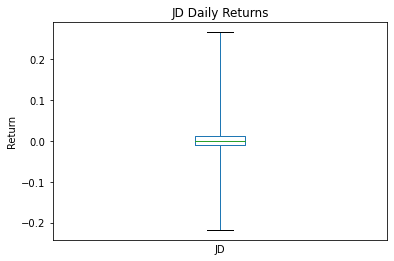

In [41]:
HSXb=HSXtr.boxplot(column='Return',whis=[0,100],grid=False)

HSXb.set_title("JD Daily Returns",fontsize=12)
HSXb.set_xlabel('JD', fontsize=10)
HSXb.set_ylabel('Return', fontsize=10)
HSXb.set_xticks([])
plt.show()

In [42]:
#Creturns=pd.concat([HSXtr['Return'],BEZtr['Return'],FTSEtr['Return']],axis=1)
#Creturns.columns=['HSX','BEZ','FTSE']

In [43]:
AllTrainingReturns=pd.DataFrame({'HSX r':HSXtr['Return'],'BEZ r':BEZtr['Return'],'FTSE r':FTSEtr['Return']})

In [44]:
print (AllTrainingReturns)

               HSX r     BEZ r    FTSE r
Date                                    
2020-03-02       NaN       NaN       NaN
2020-03-03 -0.054859  0.002838  0.009512
2020-03-04  0.024047  0.016981  0.014498
2020-03-05  0.009717 -0.023191 -0.016169
2020-03-06 -0.040898 -0.052232 -0.036210
...              ...       ...       ...
2022-01-25  0.006183  0.012162  0.010182
2022-01-26  0.009960 -0.000204  0.013335
2022-01-27  0.010701  0.012426  0.011312
2022-01-28 -0.002284 -0.017304 -0.011675
2022-01-31  0.009988  0.005324 -0.000228

[484 rows x 3 columns]


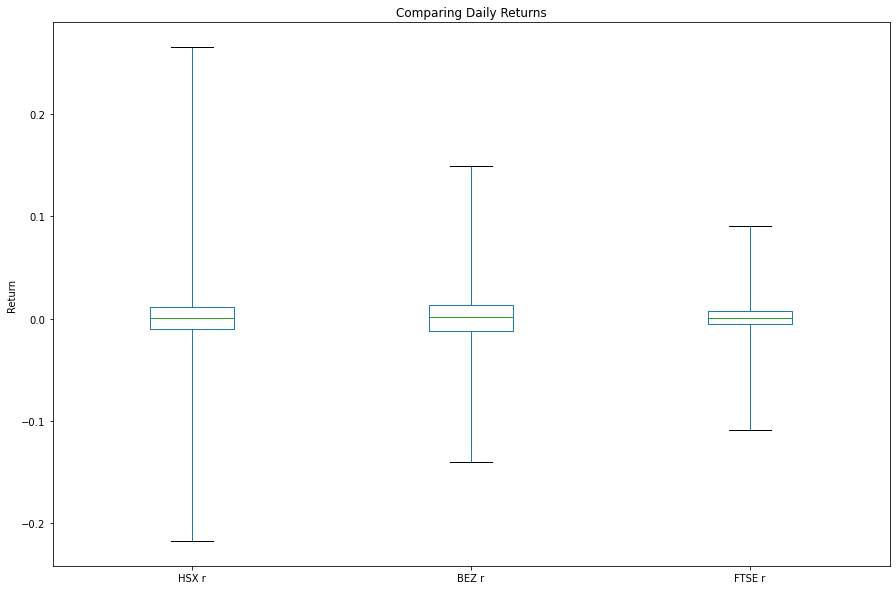

In [45]:
AllTrainingReturns.boxplot(whis=[0,100],grid=False,figsize=(15,10) )
plt.title('Comparing Daily Returns')
plt.ylabel('Return')
plt.show()

### Histogram

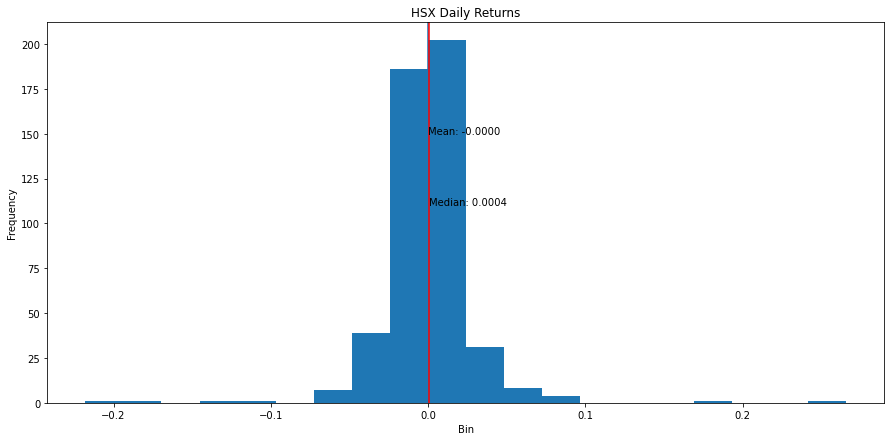

In [46]:
HSXtr.hist(column='Return',bins=20,grid=False, figsize=(15,7))

plt.title("HSX Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(HSXtr['Return'].mean())
plt.text(HSXtr['Return'].mean()*1.1,150,'Mean: {:,.4f}'.format(HSXtr['Return'].mean()))

plt.axvline(HSXtr['Return'].median(),color='r')
plt.text(HSXtr['Return'].median()*1.2,110,'Median: {:,.4f}'.format(HSXtr['Return'].median()))

plt.show()

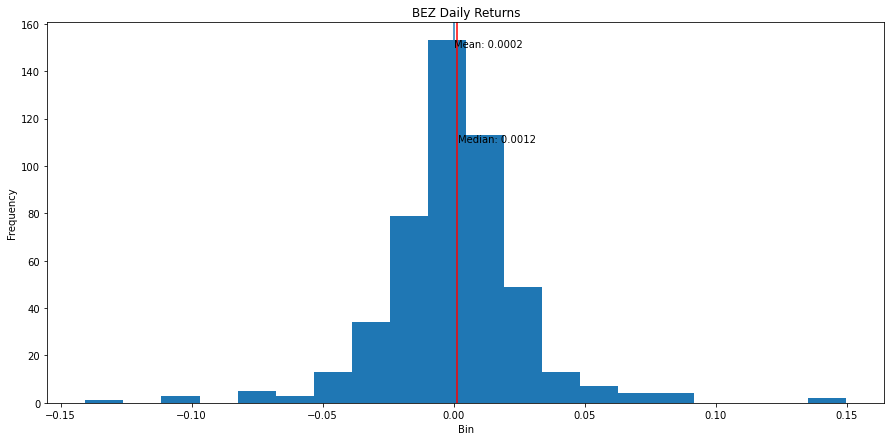

In [47]:
BEZtr.hist(column='Return',bins=20,grid=False, figsize=(15,7))

plt.title("BEZ Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(BEZtr['Return'].mean())
plt.text(BEZtr['Return'].mean()*1.1,150,'Mean: {:,.4f}'.format(BEZtr['Return'].mean()))

plt.axvline(BEZtr['Return'].median(),color='r')
plt.text(BEZtr['Return'].median()*1.2,110,'Median: {:,.4f}'.format(BEZtr['Return'].median()))

plt.show()

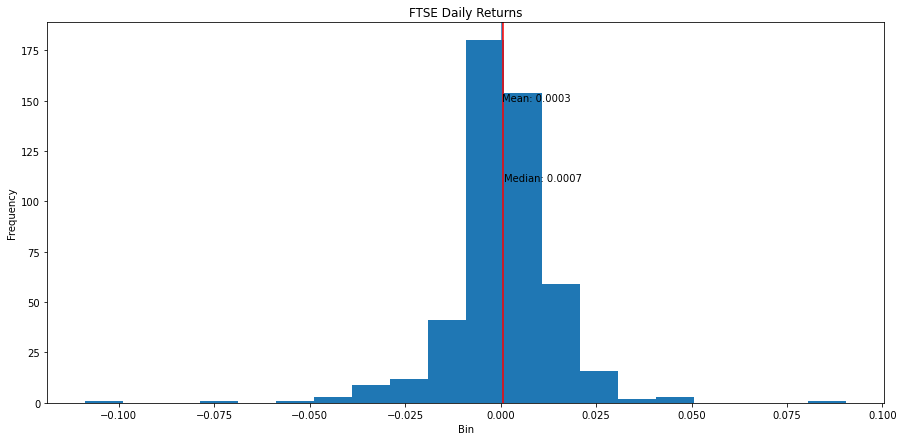

In [48]:
FTSEtr.hist(column='Return',bins=20,grid=False, figsize=(15,7))

plt.title("FTSE Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(FTSEtr['Return'].mean())
plt.text(FTSEtr['Return'].mean()*1.1,150,'Mean: {:,.4f}'.format(FTSEtr['Return'].mean()))

plt.axvline(FTSEtr['Return'].median(),color='r')
plt.text(FTSEtr['Return'].median()*1.2,110,'Median: {:,.4f}'.format(FTSEtr['Return'].median()))

plt.show()

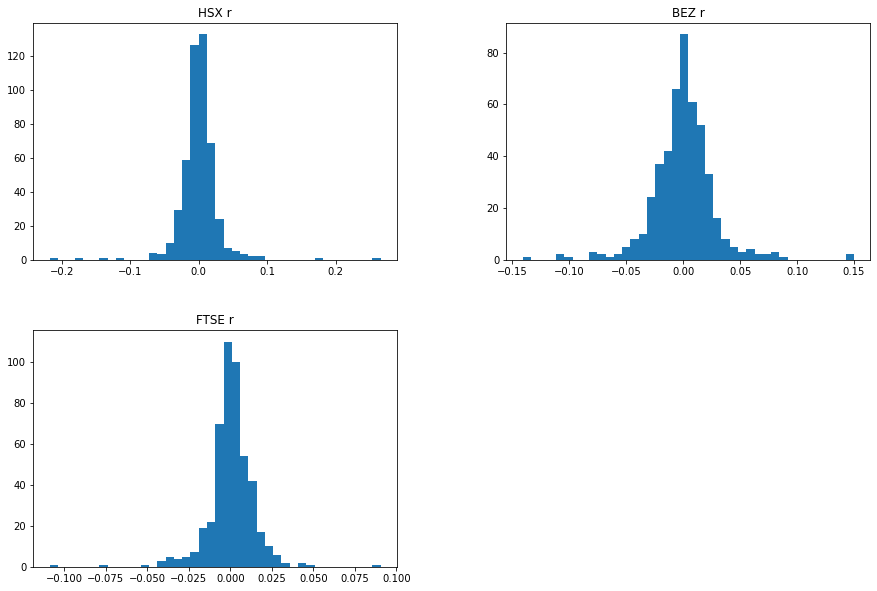

In [49]:
# it's better to draw histograms individually by the above codes

AllTrainingReturns.hist(bins=40,figsize=(15,10),grid=False)

plt.show()

## Regression

In [50]:
# The three dataframes have the same column names, we should change the names and merge them together
HSXtr.columns=['HSX_Price','HSX_Return']
BEZtr.columns=['BEZ_Price','BEZ_Return']
FTSEtr.columns=['FTSE_Price','FTSE_Return']
#concatenate them by columns
OverallTraining=pd.concat([HSXtr,BEZtr,FTSEtr],axis=1)

In [51]:
OverallTraining.head()

,HSX_Price,HSX_Return,BEZ_Price,BEZ_Return,FTSE_Price,FTSE_Return
Date,,,,,,
2020-03-02,1176.169678,NaN,503.786835,NaN,6654.899902,NaN
2020-03-03,1111.646118,-0.054859,505.216736,0.002838,6718.200195,0.009512
2020-03-04,1138.377319,0.024047,513.795898,0.016981,6815.600098,0.014498
2020-03-05,1149.438477,0.009717,501.880371,-0.023191,6705.399902,-0.016169
2020-03-06,1102.428589,-0.040898,475.666290,-0.052232,6462.600098,-0.036210


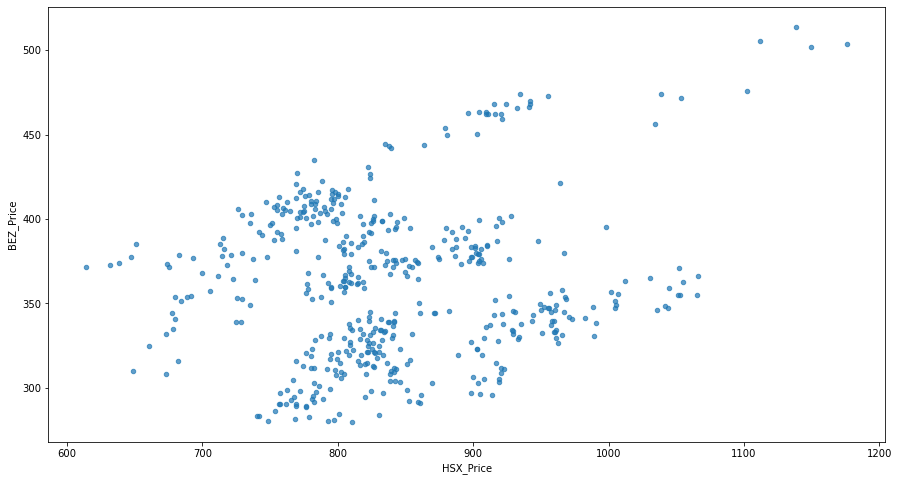

In [52]:
OverallTraining.plot.scatter(x='HSX_Price',y='BEZ_Price',alpha=0.7,figsize=(15,8))
plt.show()

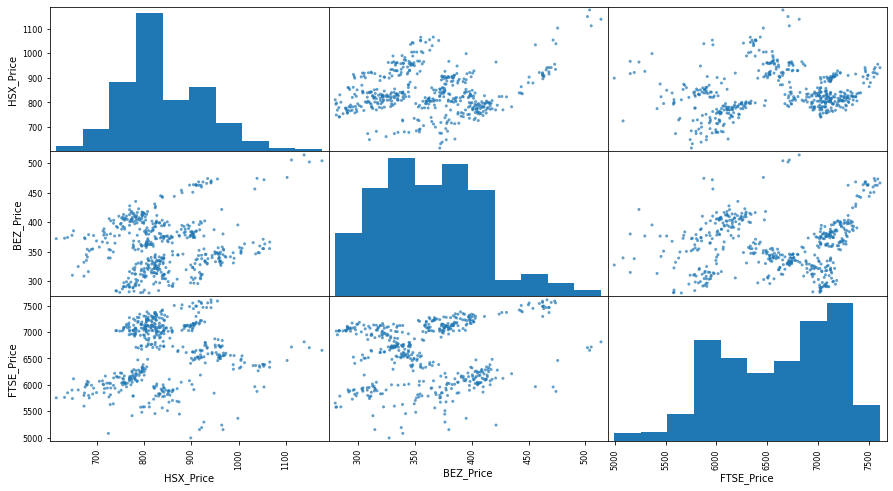

In [53]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[0,2,4]], alpha=0.7,figsize=(15,8))
plt.show()

In [54]:
OverallTraining.iloc[:,[0,2,4]].corr(method='pearson')

,HSX_Price,BEZ_Price,FTSE_Price
HSX_Price,1.000000,0.167068,0.168054
BEZ_Price,0.167068,1.000000,0.144584
FTSE_Price,0.168054,0.144584,1.000000


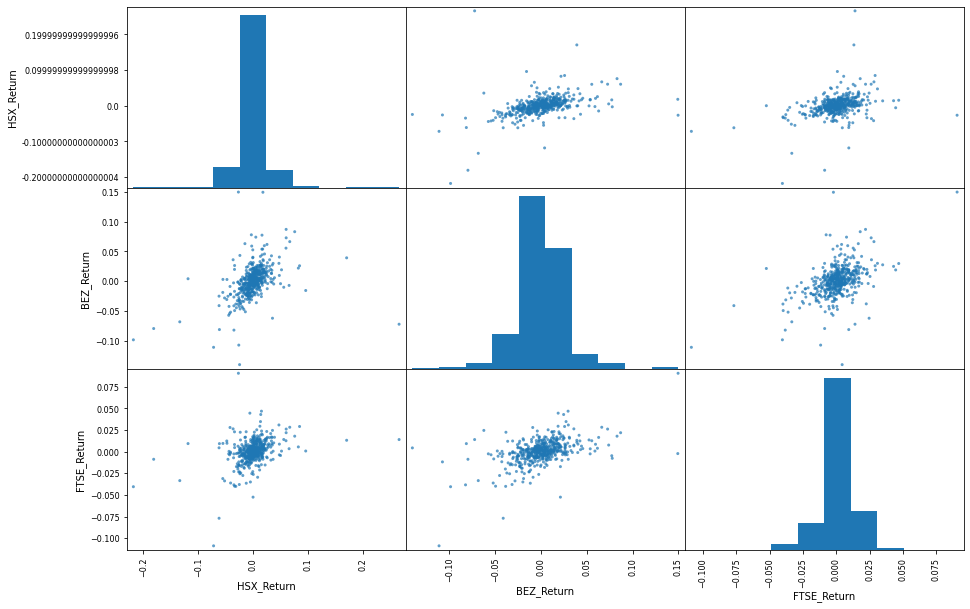

In [55]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[1,3,5]], alpha=0.7,figsize=(15,10))
plt.show()

In [56]:
OverallTraining.iloc[:,[1,3,5]].corr(method='pearson')

,HSX_Return,BEZ_Return,FTSE_Return
HSX_Return,1.000000,0.421489,0.362939
BEZ_Return,0.421489,1.000000,0.489975
FTSE_Return,0.362939,0.489975,1.000000


In [57]:
HSX_BEZ_reg=sfa.ols('HSX_Price ~ BEZ_Price', data=OverallTraining).fit()

In [58]:
HSX_BEZ_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HSX_Price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     13.84
Date:                Tue, 02 May 2023   Prob (F-statistic):           0.000223
Time:                        15:16:48   Log-Likelihood:                -2846.1
No. Observations:                 484   AIC:                             5696.
Df Residuals:                     482   BIC:                             5705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    723.8715     31.534     22.955      0.000     661.910     785.833
BEZ_Price      0.3213      0.086      3.720      0.000       0.152       0.491
==============================================================================
Omnibus:                       18.306   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.380
Skew:                           0.461   Prob(JB):                     6.19e-05
Kurtosis:                       3.334   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
HSX_FTSE_reg=sfa.ols('HSX_Price ~ FTSE_Price', data=OverallTraining).fit()

In [60]:
HSX_FTSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HSX_Price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     14.01
Date:                Tue, 02 May 2023   Prob (F-statistic):           0.000204
Time:                        15:16:48   Log-Likelihood:                -2846.0
No. Observations:                 484   AIC:                             5696.
Df Residuals:                     482   BIC:                             5704.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    669.6863     45.745     14.639      0.000     579.801     759.571
FTSE_Price     0.0258      0.007      3.743      0.000       0.012       0.039
==============================================================================
Omnibus:                       54.959   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.185
Skew:                           0.839   Prob(JB):                     1.28e-16
Kurtosis:                       3.903   Cond. No.                     7.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

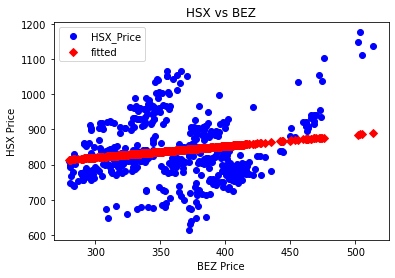

In [61]:
sa.graphics.plot_fit(HSX_BEZ_reg,exog_idx='BEZ_Price',vlines=False)
plt.ylabel("HSX Price")
plt.xlabel("BEZ Price")
plt.title("HSX vs BEZ")
plt.show()

## RETURN + FTSE

In [62]:
HSX_FTSE_rreg=sfa.ols('HSX_Return ~ FTSE_Return', data=OverallTraining).fit()

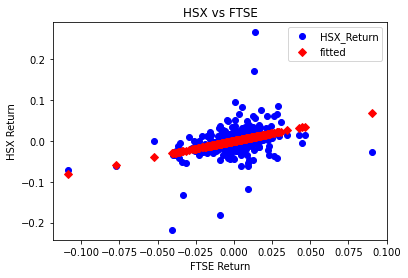

In [63]:
sa.graphics.plot_fit(HSX_FTSE_rreg,exog_idx='FTSE_Return',vlines=False)
plt.ylabel("HSX Return")
plt.xlabel("FTSE Return")
plt.title("HSX vs FTSE")
plt.show()

In [64]:
HSX_FTSE_rreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HSX_Return   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     72.97
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.75e-16
Time:                        15:16:48   Log-Likelihood:                 1050.7
No. Observations:                 483   AIC:                            -2097.
Df Residuals:                     481   BIC:                            -2089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0003      0.001     -0.223      0.823      -0.003       0.002
FTSE_Return     0.7506      0.088      8.542      0.000       0.578       0.923
==============================================================================
Omnibus:                      176.090   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13462.939
Skew:                           0.608   Prob(JB):                         0.00
Kurtosis:                      28.836   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MULTIPLE REGRESSION

In [65]:
# Multiple Regression
HSX_BEZ_FTSE_reg=sfa.ols('HSX_Price ~ BEZ_Price + FTSE_Price', data=OverallTraining).fit()

In [66]:
HSX_BEZ_FTSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HSX_Price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     12.41
Date:                Tue, 02 May 2023   Prob (F-statistic):           5.57e-06
Time:                        15:16:48   Log-Likelihood:                -2840.8
No. Observations:                 484   AIC:                             5688.
Df Residuals:                     481   BIC:                             5700.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    589.4984     51.601     11.424      0.000     488.107     690.890
BEZ_Price      0.2804      0.086      3.245      0.001       0.111       0.450
FTSE_Price     0.0226      0.007      3.271      0.001       0.009       0.036
==============================================================================
Omnibus:                       37.000   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.328
Skew:                           0.705   Prob(JB):                     3.90e-10
Kurtosis:                       3.402   Cond. No.                     8.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Time Series

In [67]:
HSXte.columns=['HSX_Price','HSX_Return']
BEZte.columns=['BEZ_Price','BEZ_Return']
FTSEte.columns=['FTSE_Price','FTSE_Return']

### Moving Average

In [68]:
ma5=HSXtr.rolling(5).mean()

In [69]:
ma20=HSXtr.rolling(20).mean()

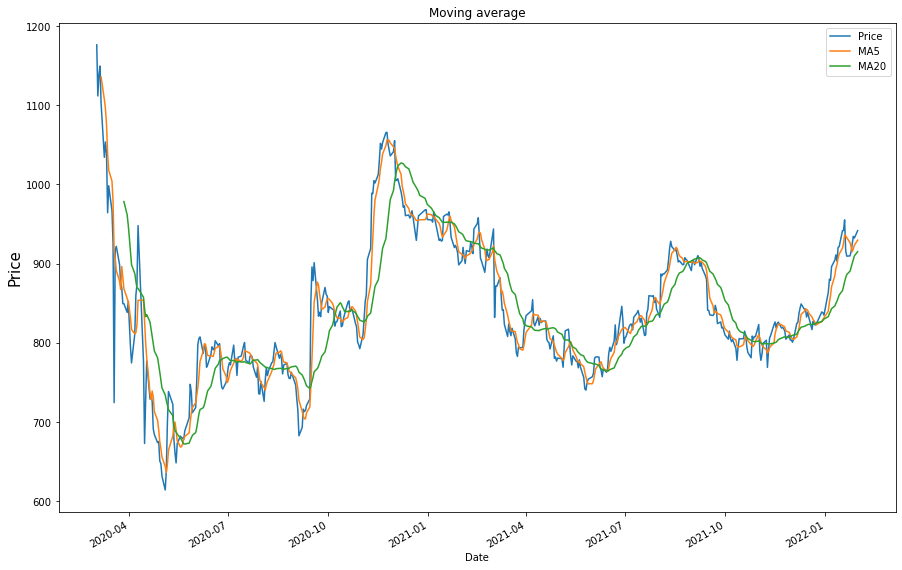

In [70]:
HSXtr['HSX_Price'].plot(figsize=(15,10), title= 'Moving average', label='Price')
ma5['HSX_Price'].plot(label='MA5')
ma20['HSX_Price'].plot(label='MA20')
plt.legend()
plt.ylabel('Price',fontsize=15)
plt.show()

In [71]:
#creat forecasts
HSXma5fcsts=pd.Series([ma5['HSX_Price'][-1]]*20)
HSXma5fcsts.index=HSXte.index

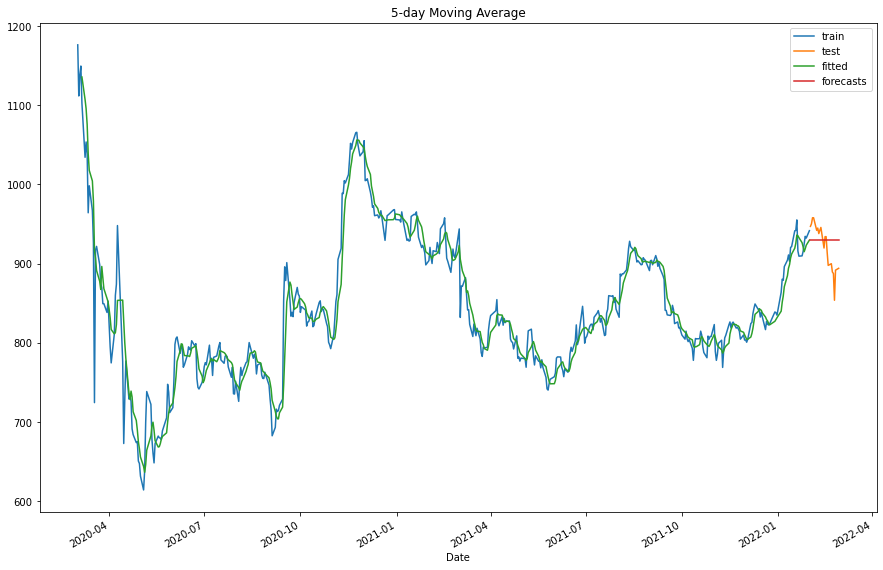

In [72]:
HSXtr['HSX_Price'].plot(figsize=(15,10),label='train',title='5-day Moving Average')
HSXte['HSX_Price'].plot(label='test')
ma5['HSX_Price'].plot(label='fitted')
HSXma5fcsts.plot(label='forecasts')
plt.legend()
plt.show()

In [73]:
MAE(HSXte['HSX_Price'],HSXma5fcsts)

24.308076782226568

In [74]:
MSE(HSXte['HSX_Price'],HSXma5fcsts)

866.144799657575

In [75]:
print(
    'MAE: {:,.4f}'.format(MAE(HSXte['HSX_Price'],HSXma5fcsts)),
    '\nMSE: {:,.4f}'.format(MSE(HSXte['HSX_Price'],HSXma5fcsts))
                         )

MAE: 24.3081 
MSE: 866.1448


### Single Exponential Smoothing

In [76]:
HSXses=SES(HSXtr['HSX_Price'],initialization_method="estimated").fit()

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [77]:
HSXsesfcsts=HSXses.forecast(20)
HSXsesfcsts.index=HSXte.index

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


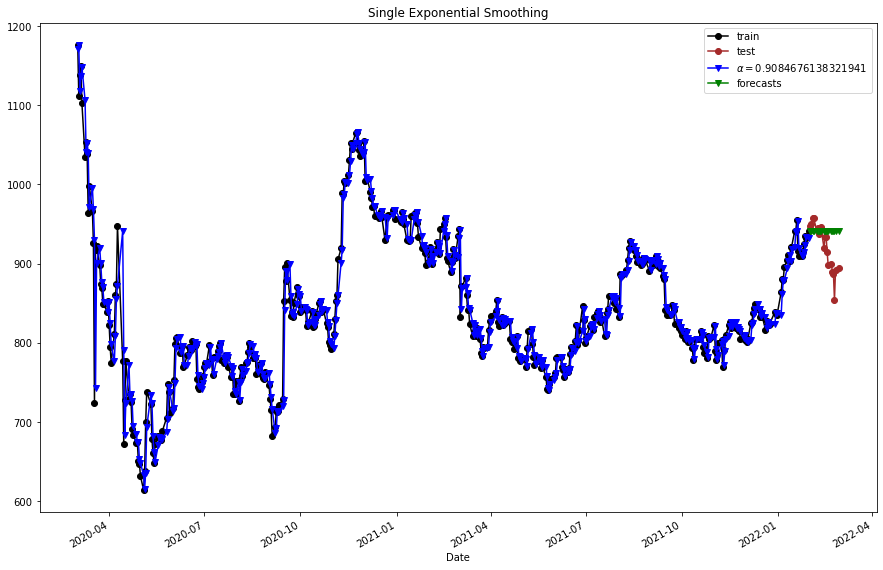

In [78]:
HSXtr['HSX_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Single Exponential Smoothing')
HSXte['HSX_Price'].plot(marker='o',color='brown',label='test')
HSXses.fittedvalues.plot(marker='v', color='blue',label=r'$\alpha=%s$'%HSXses.model.params['smoothing_level'])
HSXsesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [79]:
print(
    'MAE: {:,.4f}'.format(MAE(HSXte['HSX_Price'],HSXsesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(HSXte['HSX_Price'],HSXsesfcsts))
)

MAE: 24.8262 
MSE: 1,157.3412


### Double Exponential Smoothing

In [80]:
HSXdes=DES(HSXtr['HSX_Price'],initialization_method="estimated").fit()

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [81]:
HSXdesfcsts=HSXdes.forecast(20)
HSXdesfcsts.index=HSXte.index

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


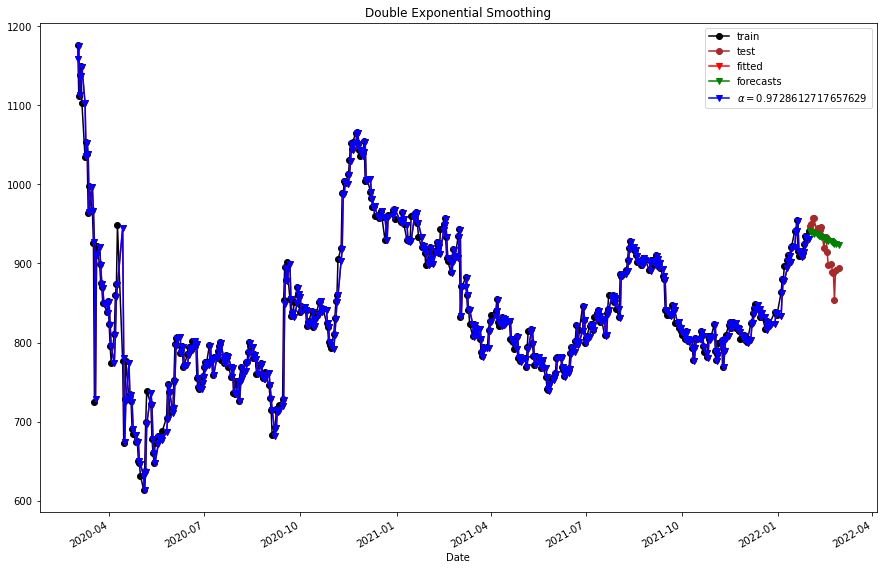

In [82]:
HSXtr['HSX_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Double Exponential Smoothing')
HSXte['HSX_Price'].plot(marker='o',color='brown',label='test')
HSXdes.fittedvalues.plot(marker='v', color='r',label='fitted')
HSXdesfcsts.plot(marker='v', color='green',label='forecasts')
HSXdes.fittedvalues.plot(marker='v', color='b',label=r'$\alpha=%s$'%HSXdes.model.params['smoothing_level'])
plt.legend()
plt.show()

In [83]:
print(
    'MAE: {:,.4f}'.format(MAE(HSXte['HSX_Price'],HSXdesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(HSXte['HSX_Price'],HSXdesfcsts))
)

MAE: 19.8103 
MSE: 665.9290


### Holt's Winters (Additive)

In [84]:
HSXtesa=TES(HSXtr['HSX_Price'],seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
HSXtesfcstsa=HSXtesa.forecast(20)
HSXtesfcstsa.index=HSXte.index

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


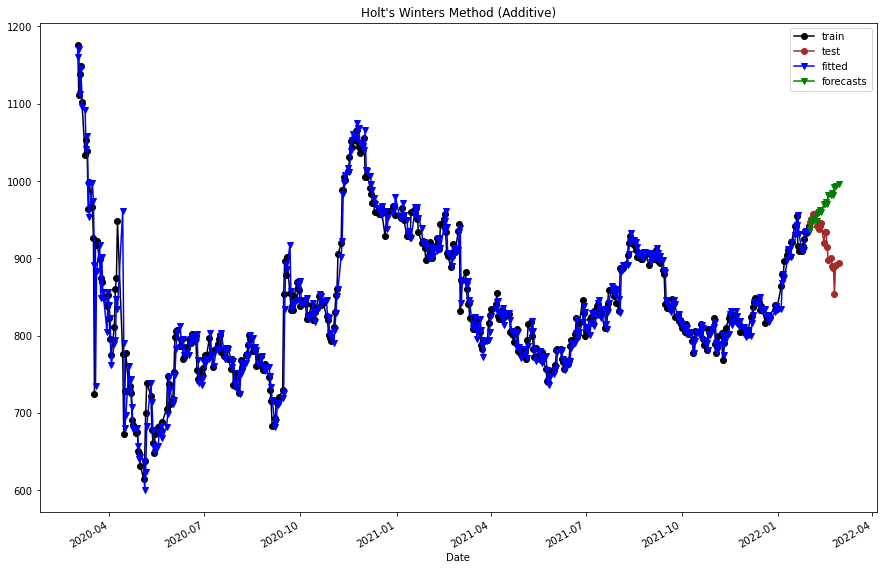

In [85]:
HSXtr['HSX_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Additive)")
HSXte['HSX_Price'].plot(marker='o',color='brown',label='test')
HSXtesa.fittedvalues.plot(marker='v', color='blue',label='fitted')
HSXtesfcstsa.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [86]:
print(
    'MAE: {:,.4f}'.format(MAE(HSXte['HSX_Price'],HSXtesfcstsa)),
    '\nMSE: {:,.4f}'.format(MSE(HSXte['HSX_Price'],HSXtesfcstsa))
)

MAE: 49.0382 
MSE: 4,069.7803


### Holt's Winters (Multiplicative)

In [87]:
HSXtesm=TES(HSXtr['HSX_Price'],seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
HSXtesfcstsm=HSXtesm.forecast(20)
HSXtesfcstsm.index=HSXte.index

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


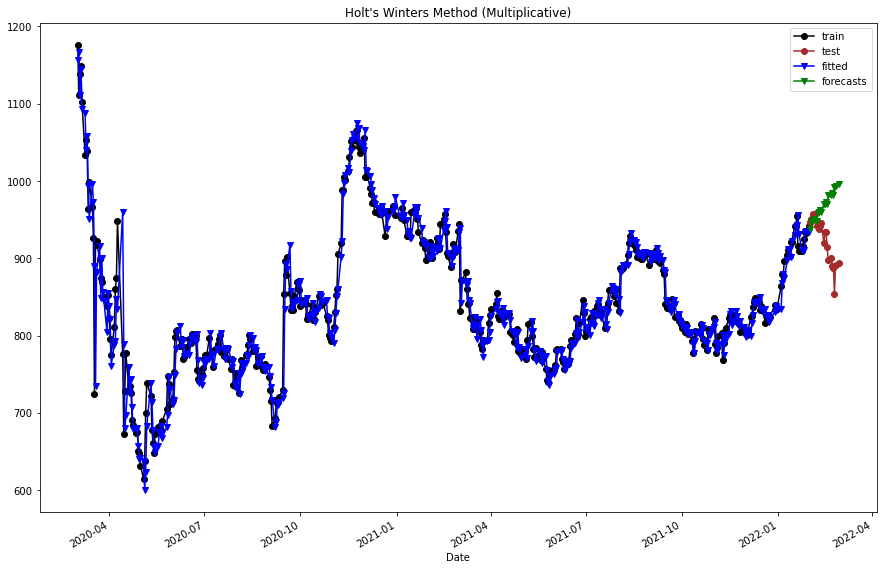

In [88]:
HSXtr['HSX_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Multiplicative)")
HSXte['HSX_Price'].plot(marker='o',color='brown',label='test')
HSXtesm.fittedvalues.plot(marker='v', color='blue',label='fitted')
HSXtesfcstsm.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [89]:
print(
    'MAE: {:,.4f}'.format(MAE(HSXte['HSX_Price'],HSXtesfcstsm)),
    '\nMSE: {:,.4f}'.format(MSE(HSXte['HSX_Price'],HSXtesfcstsm))
)

MAE: 49.0397 
MSE: 4,070.0424
